<a id="table"></a>
<h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table of Contents</h1>

[1. Notebook Versions](#1)

[2. Loading Libraries](#2)

[3. Reading Data Files](#3)

[4. Data Exploration](#4)

[5. Baseline Modeling 1.0](#5)

<a id="1"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Notebook Versions</h1>

1. Version 1 (05/12/2023)
    * EDA 
    * Baseline modeling 1.0
    
<a id="2"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Loading Libraries</h1> 

In [1]:
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.metrics import log_loss
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id="3"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Reading Data Files</h1> 

In [2]:
train = pd.read_csv('../input/icr-identify-age-related-conditions/train.csv')
names = train.columns.tolist()
features = [x.replace(' ', '') for x in names]
train.columns = features

test = pd.read_csv('../input/icr-identify-age-related-conditions/test.csv')
names = test.columns.tolist()
features = [x.replace(' ', '') for x in names]
test.columns = features

greeks = pd.read_csv('../input/icr-identify-age-related-conditions/greeks.csv')
submission = pd.read_csv('../input/icr-identify-age-related-conditions/sample_submission.csv')

print('The dimension of the train dataset is:', train.shape)
print('The dimension of the test dataset is:', test.shape)
print('The dimension of the greeks dataset is:', greeks.shape)
print('The dimension of the submission dataset is:', submission.shape)

The dimension of the train dataset is: (617, 58)
The dimension of the test dataset is: (5, 57)
The dimension of the greeks dataset is: (617, 6)
The dimension of the submission dataset is: (5, 3)


In [3]:
train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.069225,13.784111,1.302012,36.205956,69.08340,295.570575,0.23868,0.284232,89.245560,84.31664,29.657104,5.310690,1.74307,23.187704,7.294176,1.987283,1433.166750,0.949104,B,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.23868,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,A,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.23868,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,8.146651,1494.076488,0.377208,B,109.125159,78.526968,5.390628,224.207424,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.23868,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,B,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,24.0108,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.23868,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,B,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [4]:
test.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
test.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
count,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id="4"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Data Exploration</h1> 

We first start by visualizing the target variable.

<AxesSubplot: xlabel='Class', ylabel='count'>

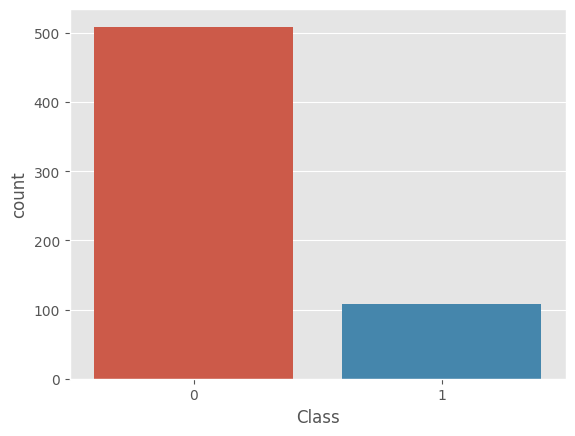

In [6]:
sns.countplot(data = train, x = 'Class')

From the above, we see that `Class` is imbalanced (~82% 0s and ~18% 1s). We start exploring the data by comparing the distribution of the features that start with `A`.

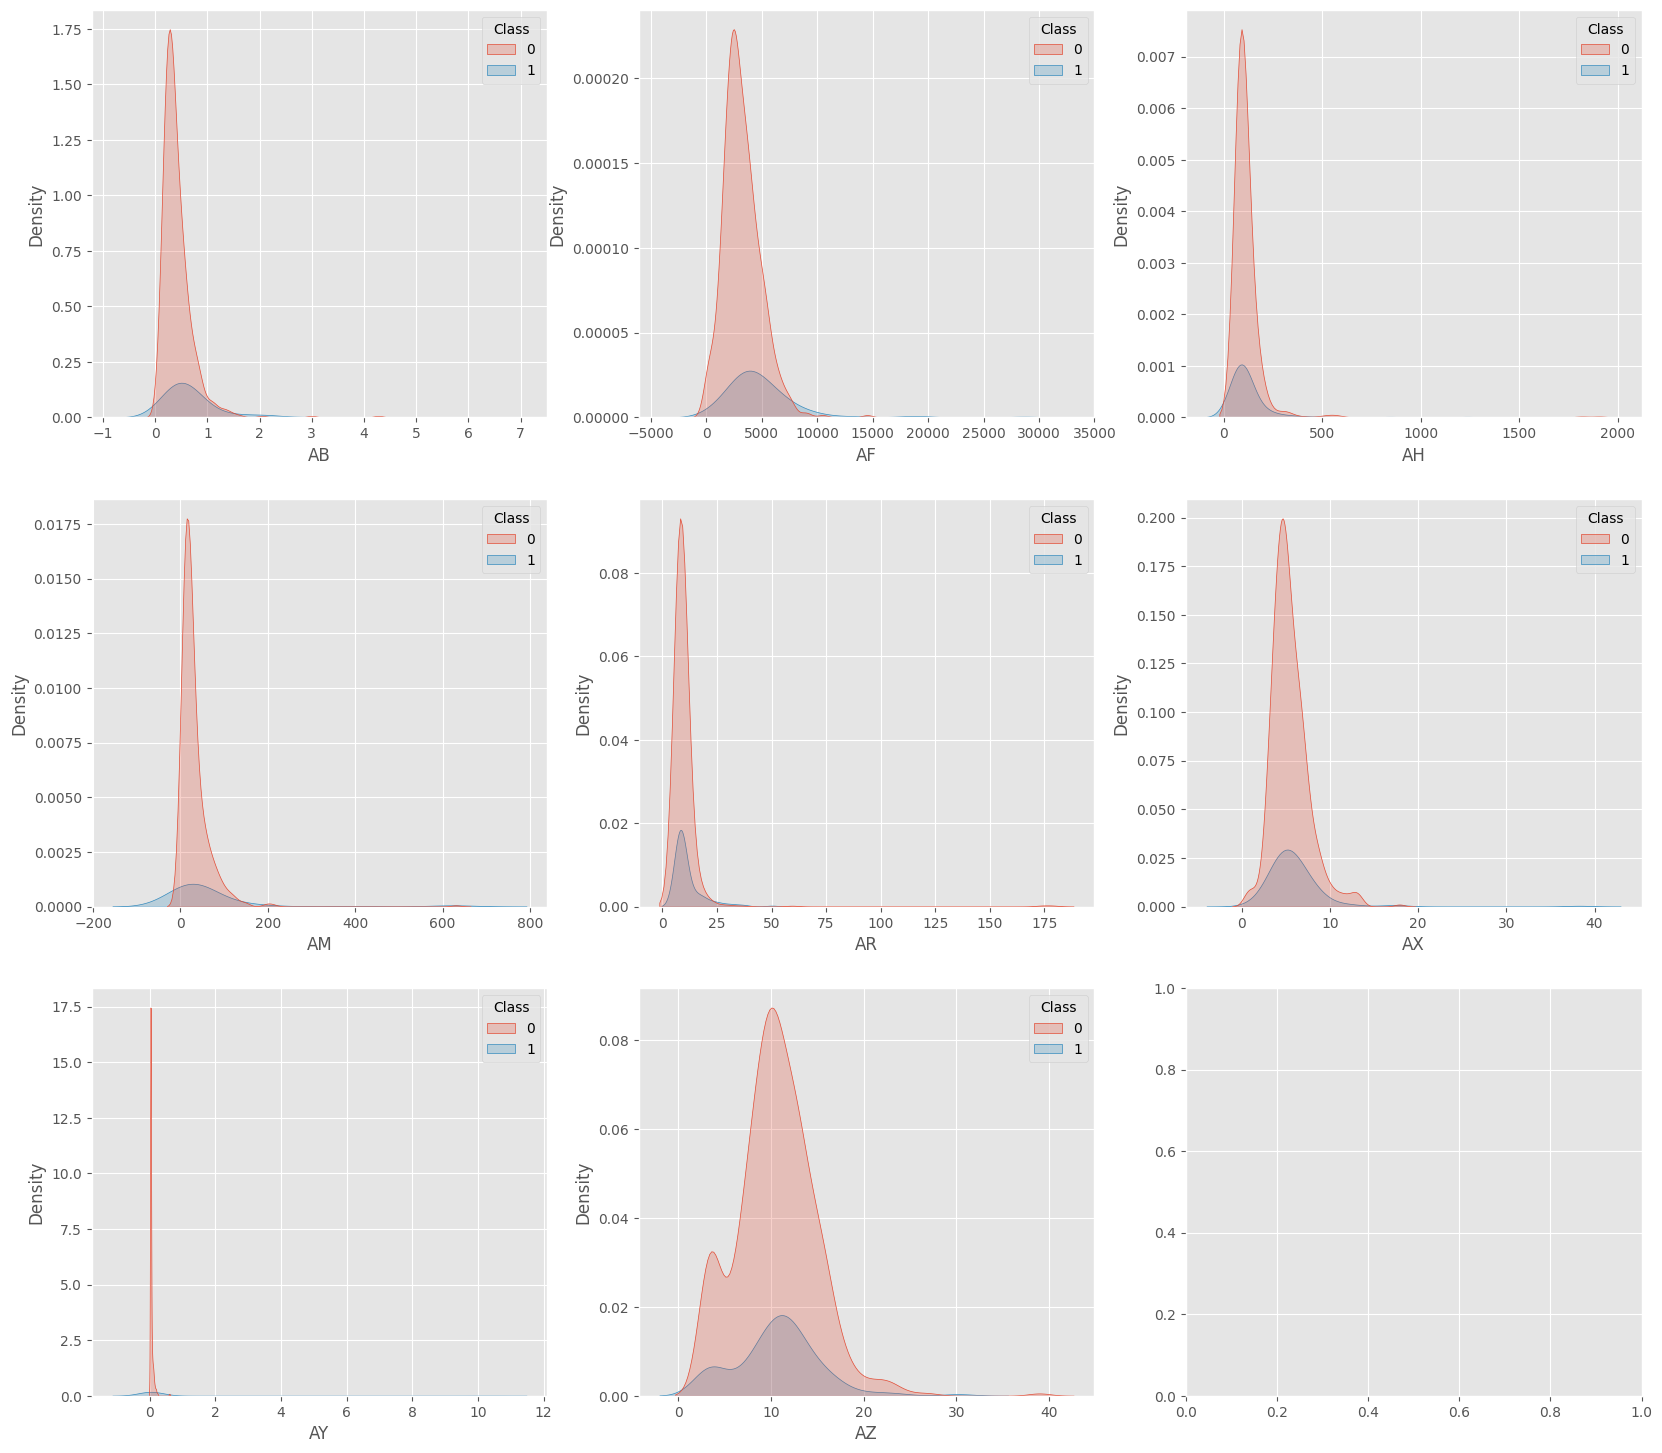

In [7]:
fig, axes = plt.subplots(3, 3, figsize = (20, 18))

sns.kdeplot(ax = axes[0, 0], x = 'AB', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[0, 1], x = 'AF', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[0, 2], x = 'AH', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[1, 0], x = 'AM', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[1, 1], x = 'AR', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[1, 2], x = 'AX', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[2, 0], x = 'AY', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[2, 1], x = 'AZ', hue = 'Class', data = train, fill = True);

From the above, the distribution of `Class` is very similar in 0 and 1. Next we compare the distribution of `Class` of features that start with `B`.

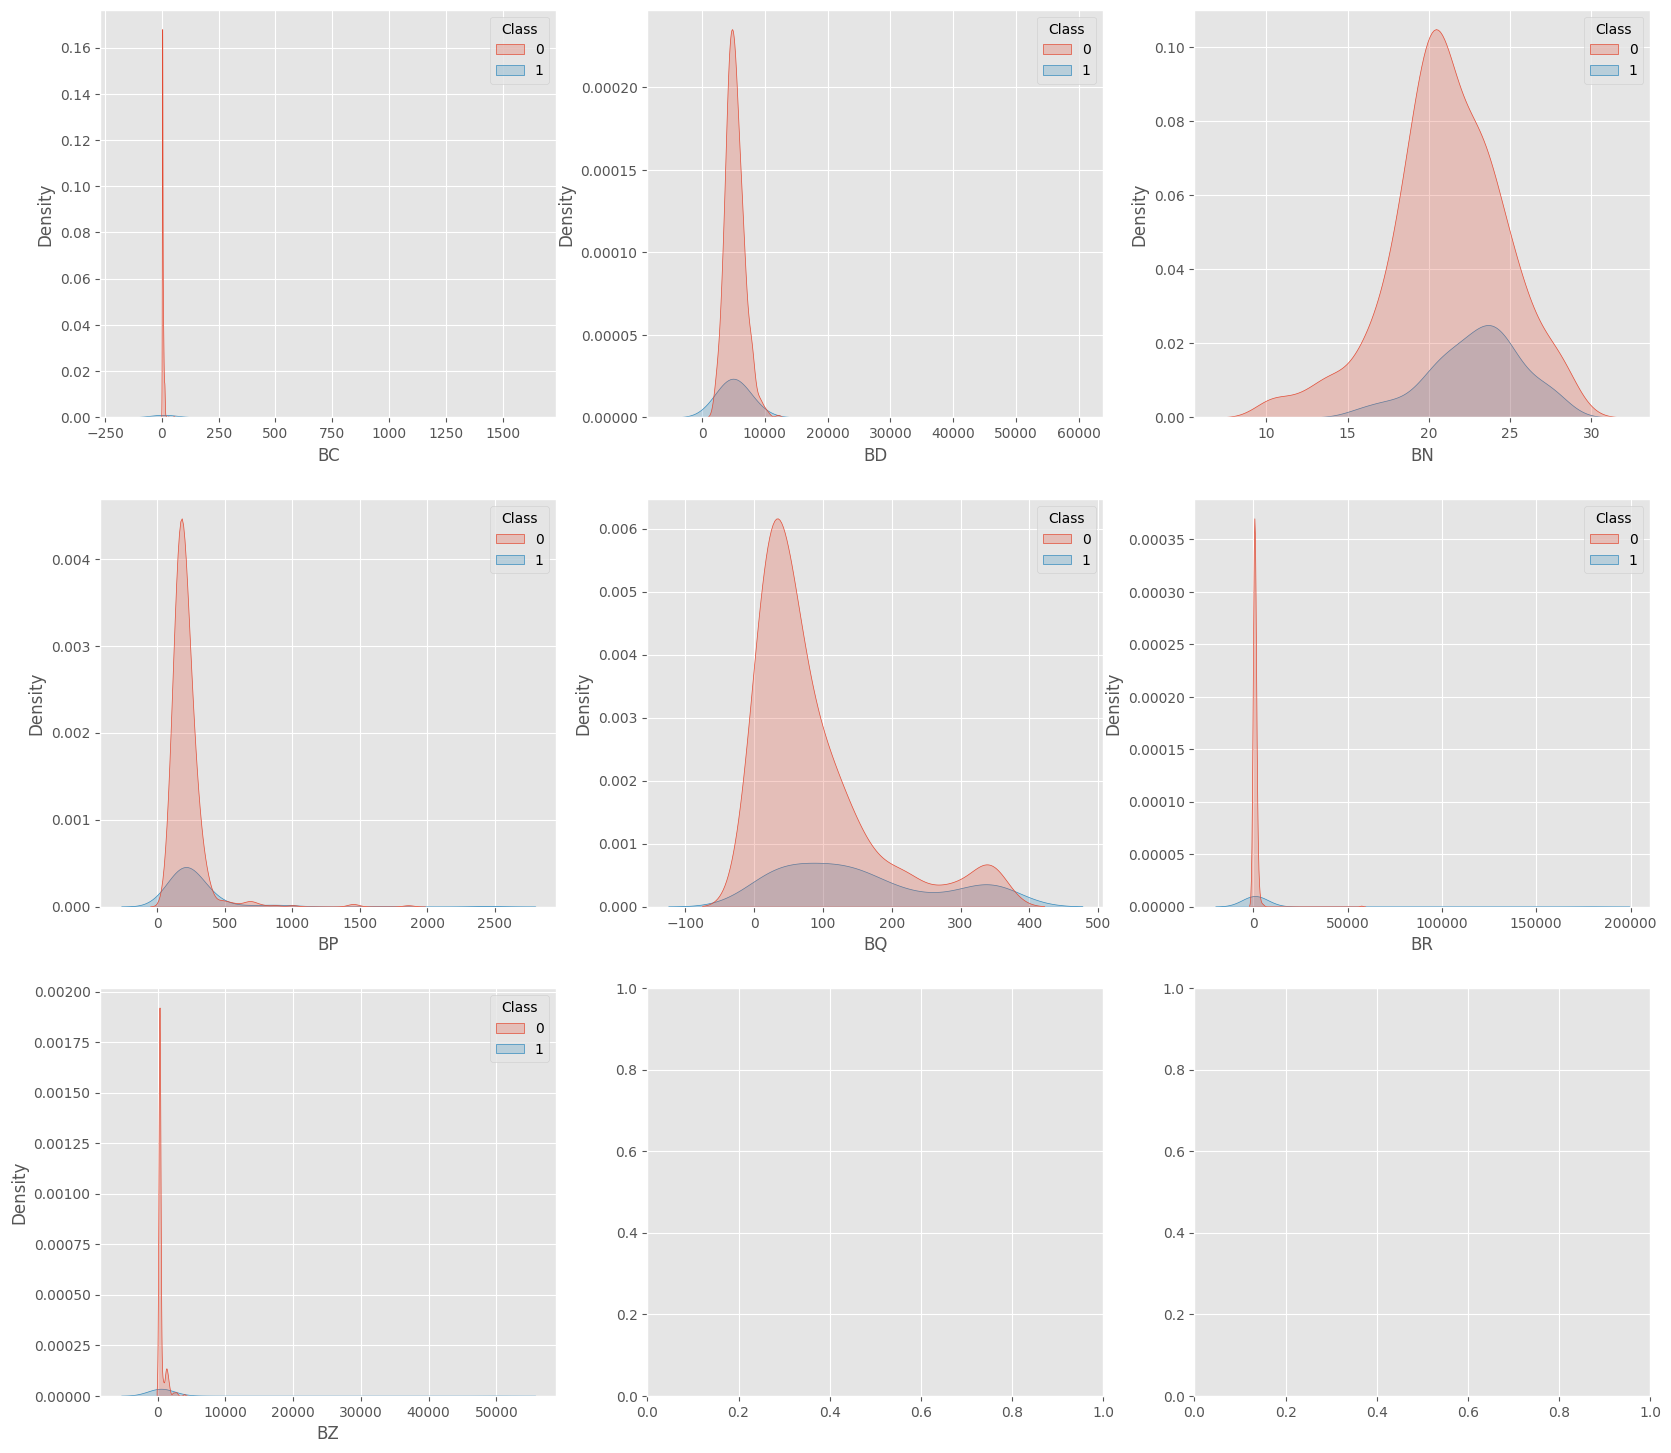

In [8]:
fig, axes = plt.subplots(3, 3, figsize = (20, 18))

sns.kdeplot(ax = axes[0, 0], x = 'BC', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[0, 1], x = 'BD', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[0, 2], x = 'BN', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[1, 0], x = 'BP', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[1, 1], x = 'BQ', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[1, 2], x = 'BR', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[2, 0], x = 'BZ', hue = 'Class', data = train, fill = True);

From the above, the distribution of `Class` is very similar in 0 and 1. Next we compare the distribution of `Class` of features that start with `C`.

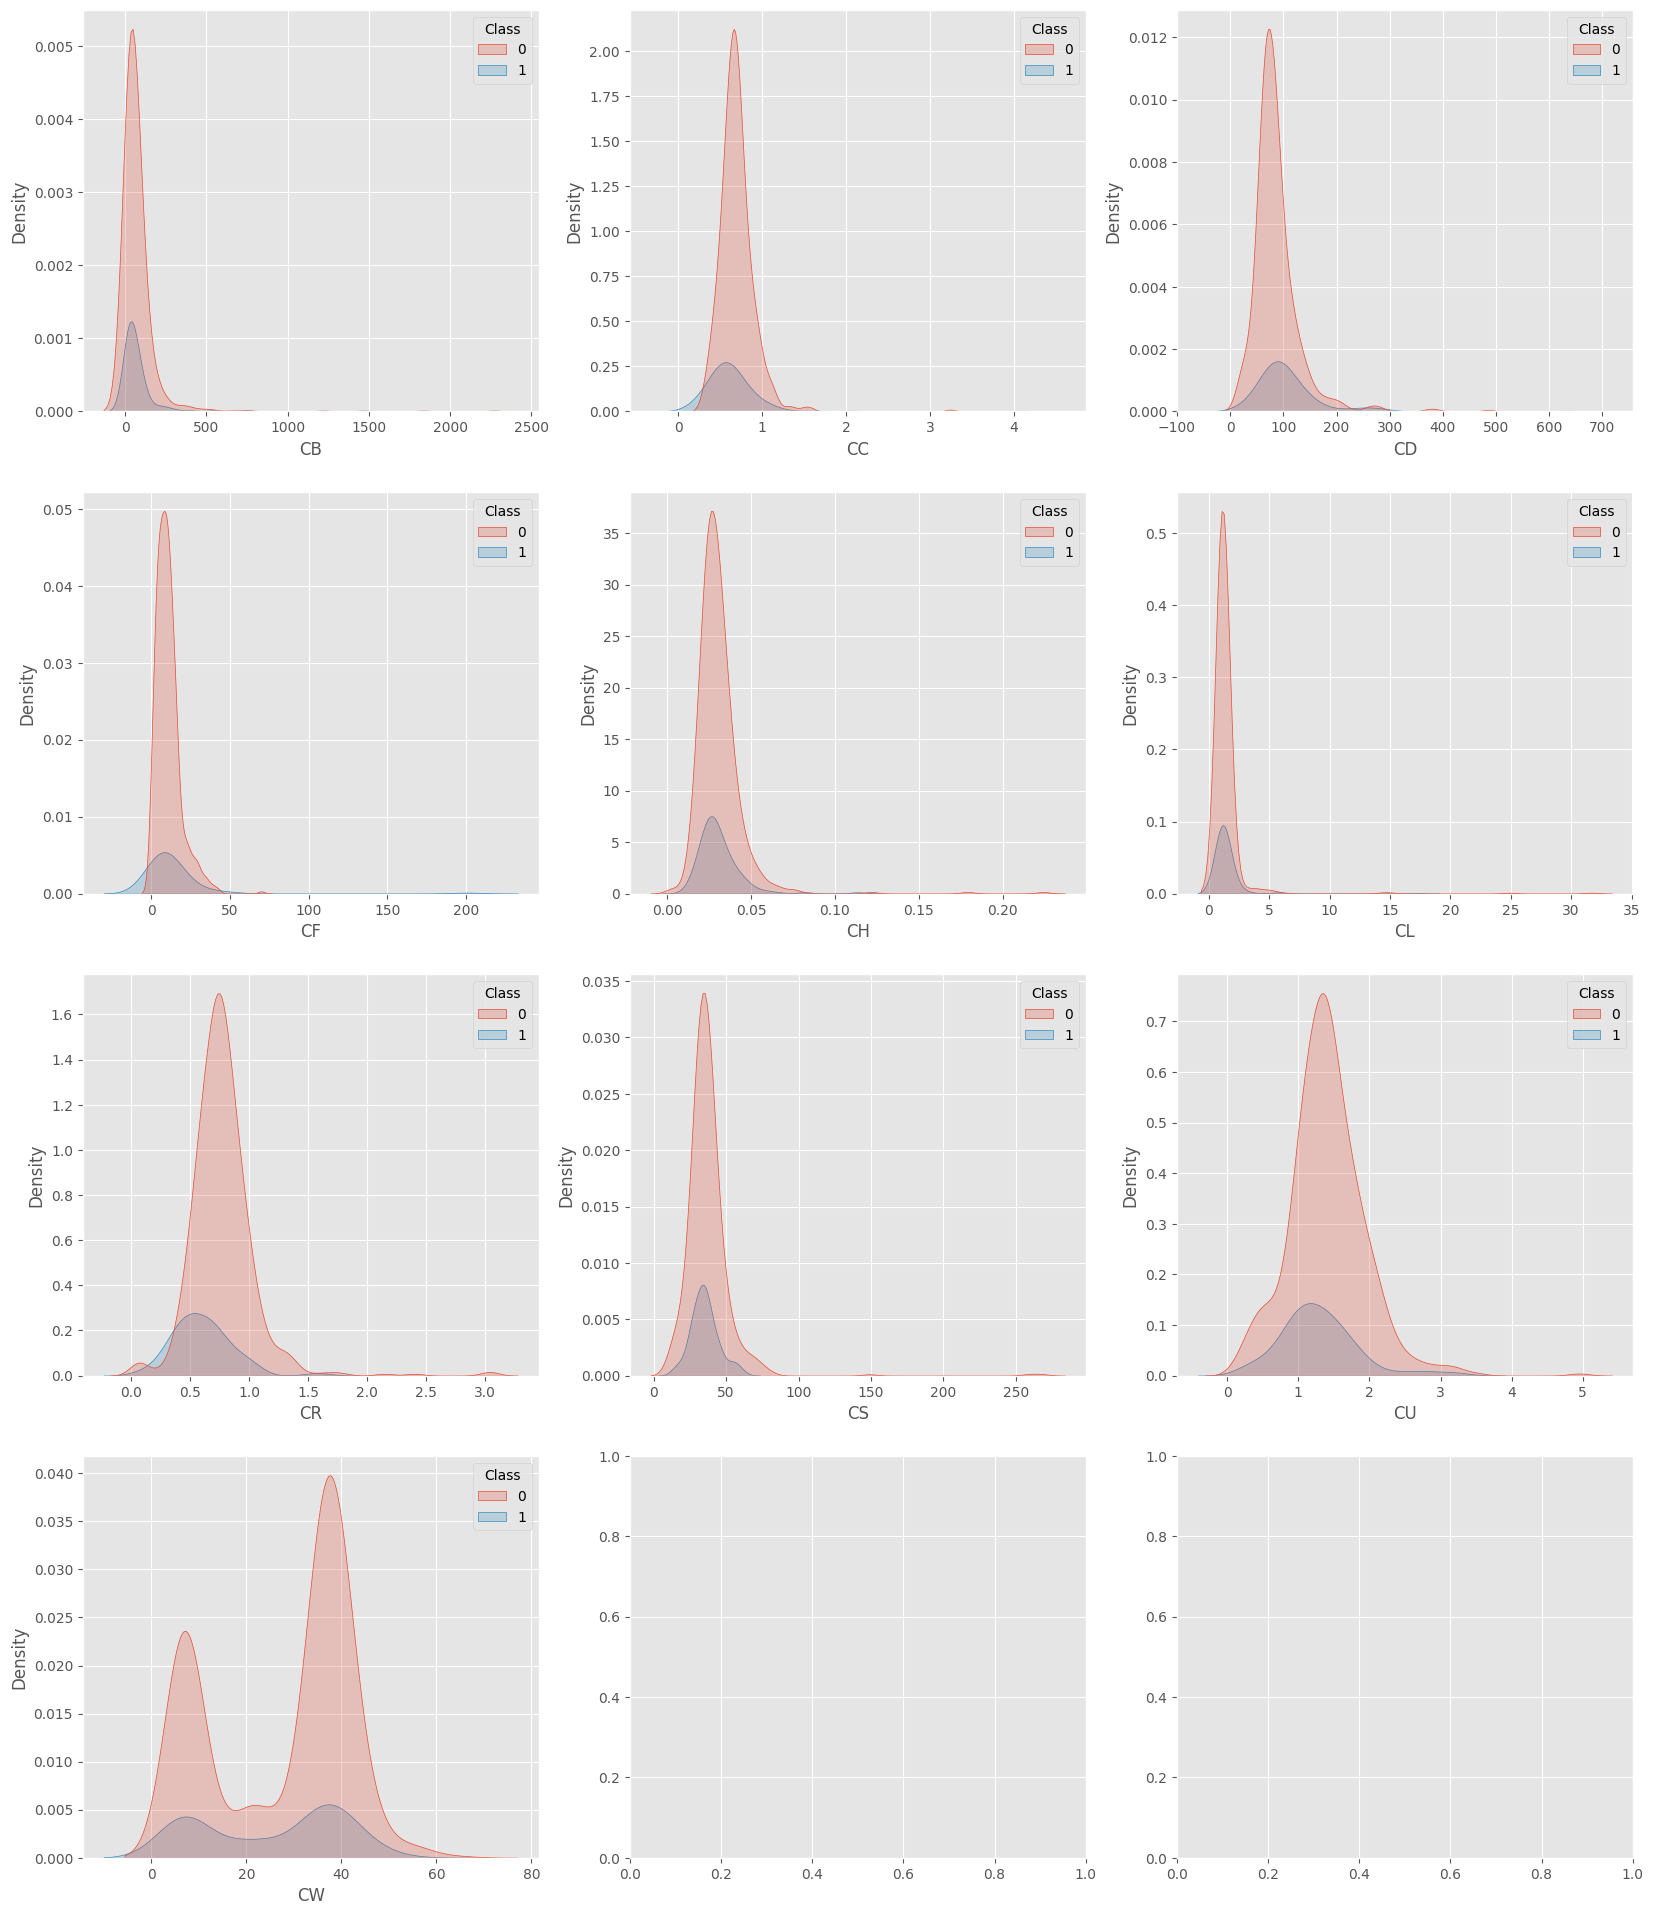

In [9]:
fig, axes = plt.subplots(4, 3, figsize = (20, 24))

sns.kdeplot(ax = axes[0, 0], x = 'CB', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[0, 1], x = 'CC', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[0, 2], x = 'CD', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[1, 0], x = 'CF', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[1, 1], x = 'CH', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[1, 2], x = 'CL', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[2, 0], x = 'CR', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[2, 1], x = 'CS', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[2, 2], x = 'CU', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[3, 0], x = 'CW', hue = 'Class', data = train, fill = True);

From the above, the distribution of `Class` is very similar in 0 and 1. Next we compare the distribution of `Class` of features that start with `D`.

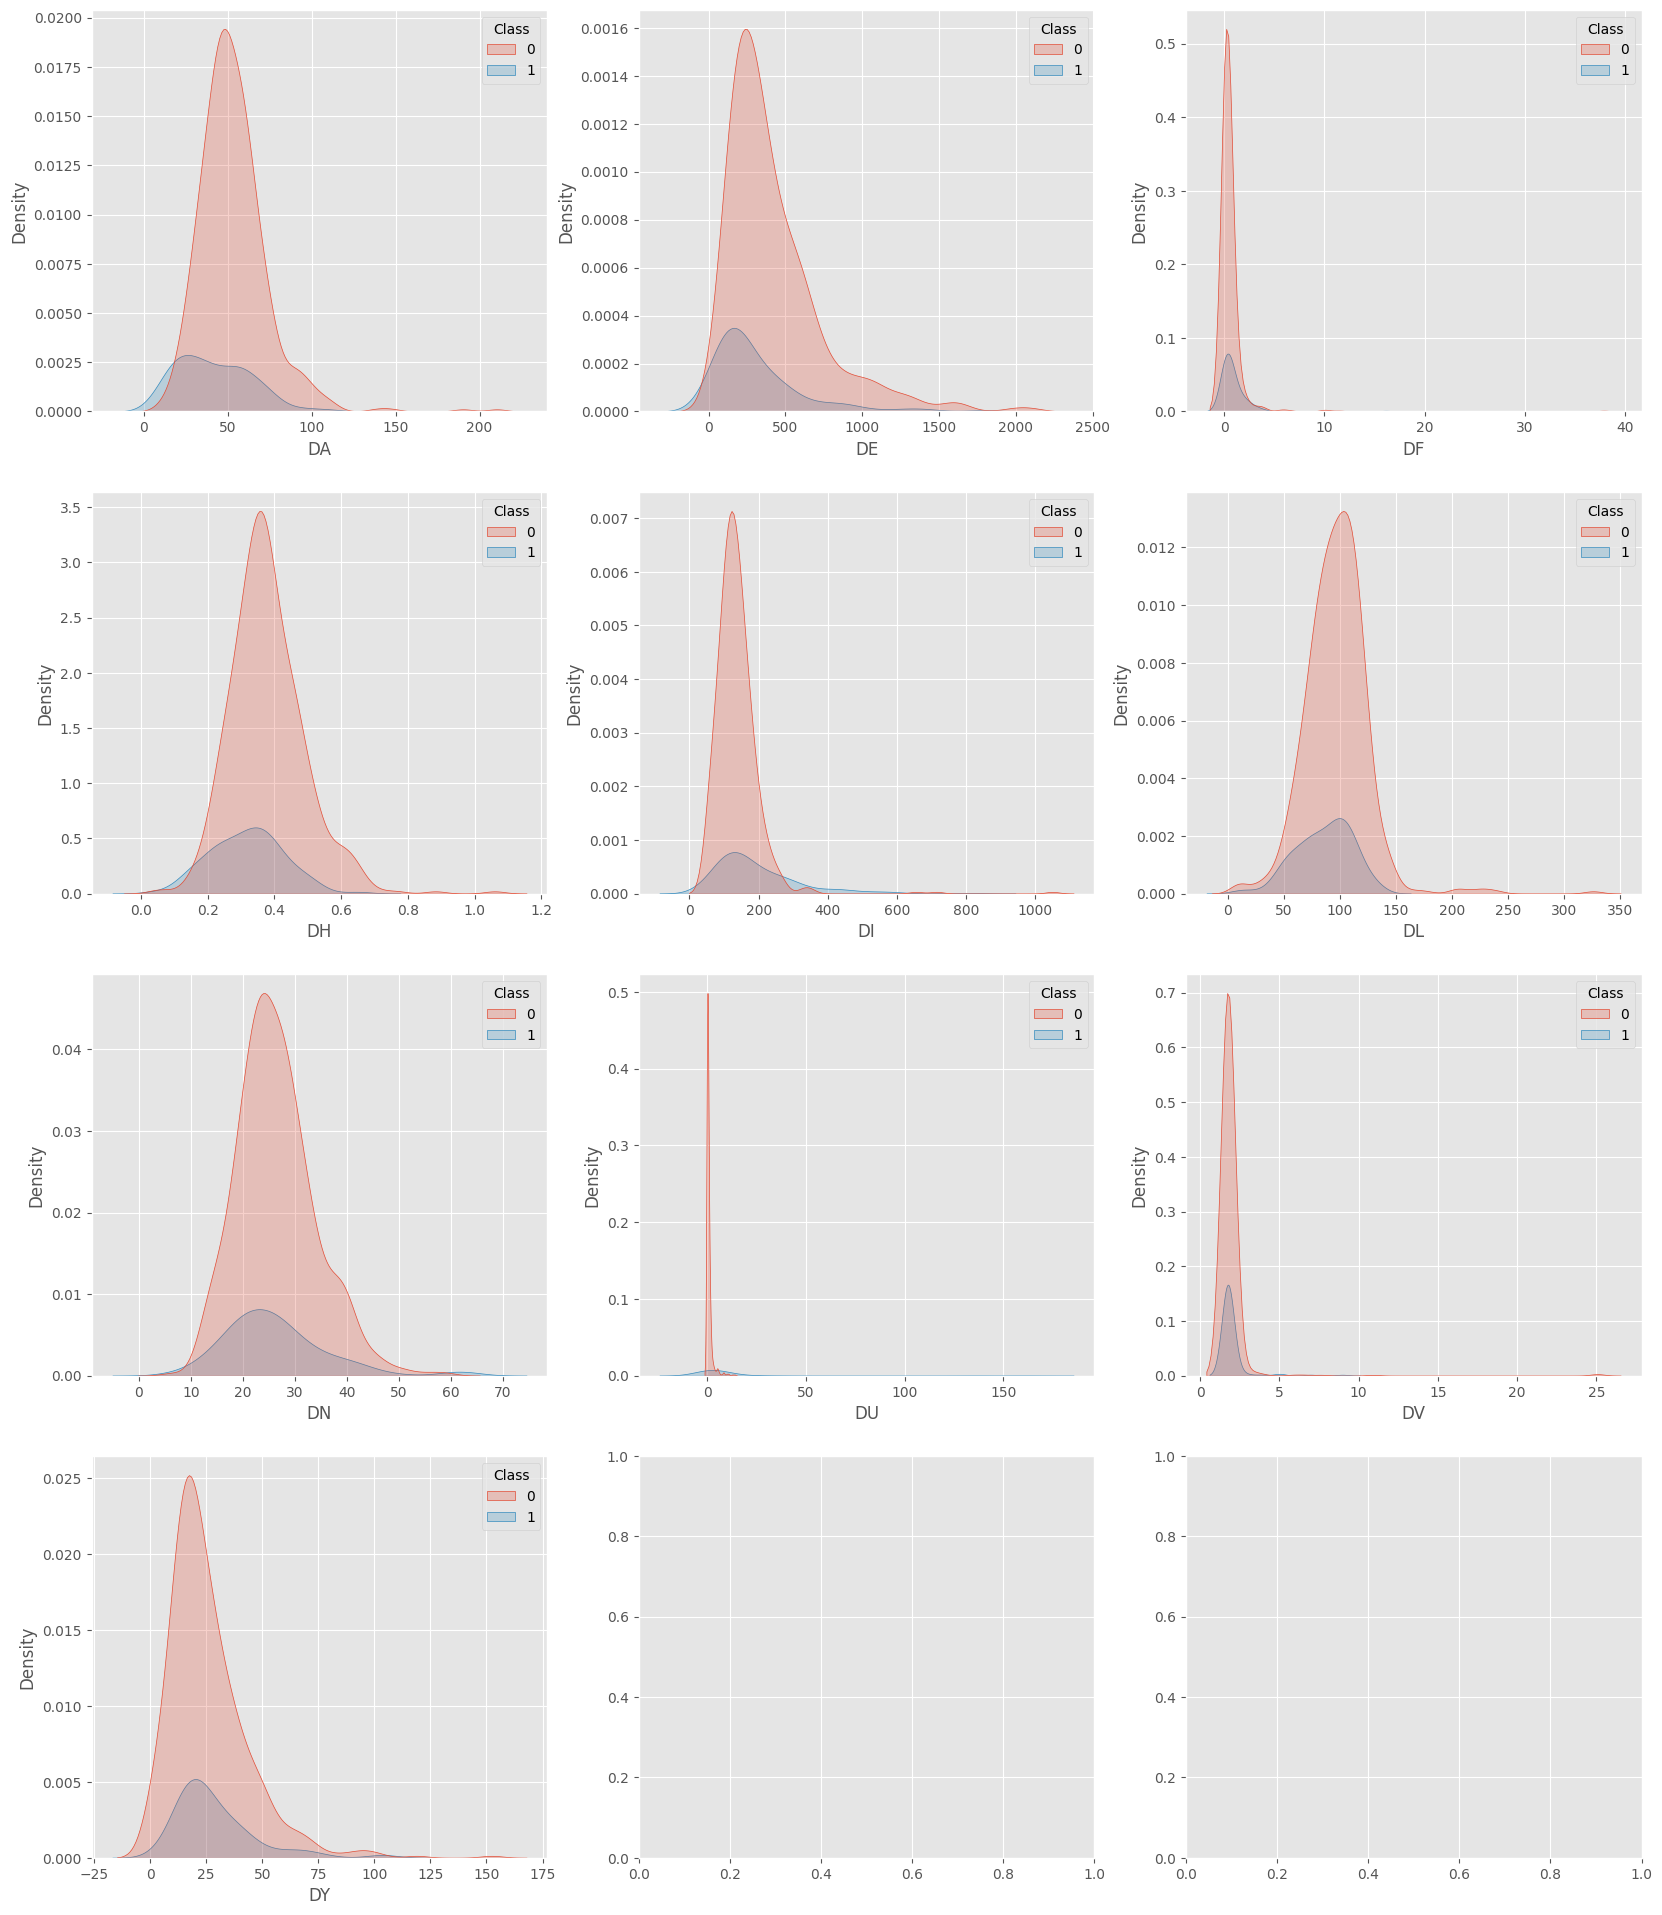

In [10]:
fig, axes = plt.subplots(4, 3, figsize = (20, 24))

sns.kdeplot(ax = axes[0, 0], x = 'DA', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[0, 1], x = 'DE', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[0, 2], x = 'DF', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[1, 0], x = 'DH', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[1, 1], x = 'DI', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[1, 2], x = 'DL', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[2, 0], x = 'DN', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[2, 1], x = 'DU', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[2, 2], x = 'DV', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[3, 0], x = 'DY', hue = 'Class', data = train, fill = True);

From the above, the distribution of `Class` is very similar in 0 and 1. Next we compare the distribution of `Class` of features that start with `E`.

<AxesSubplot: xlabel='EU', ylabel='Density'>

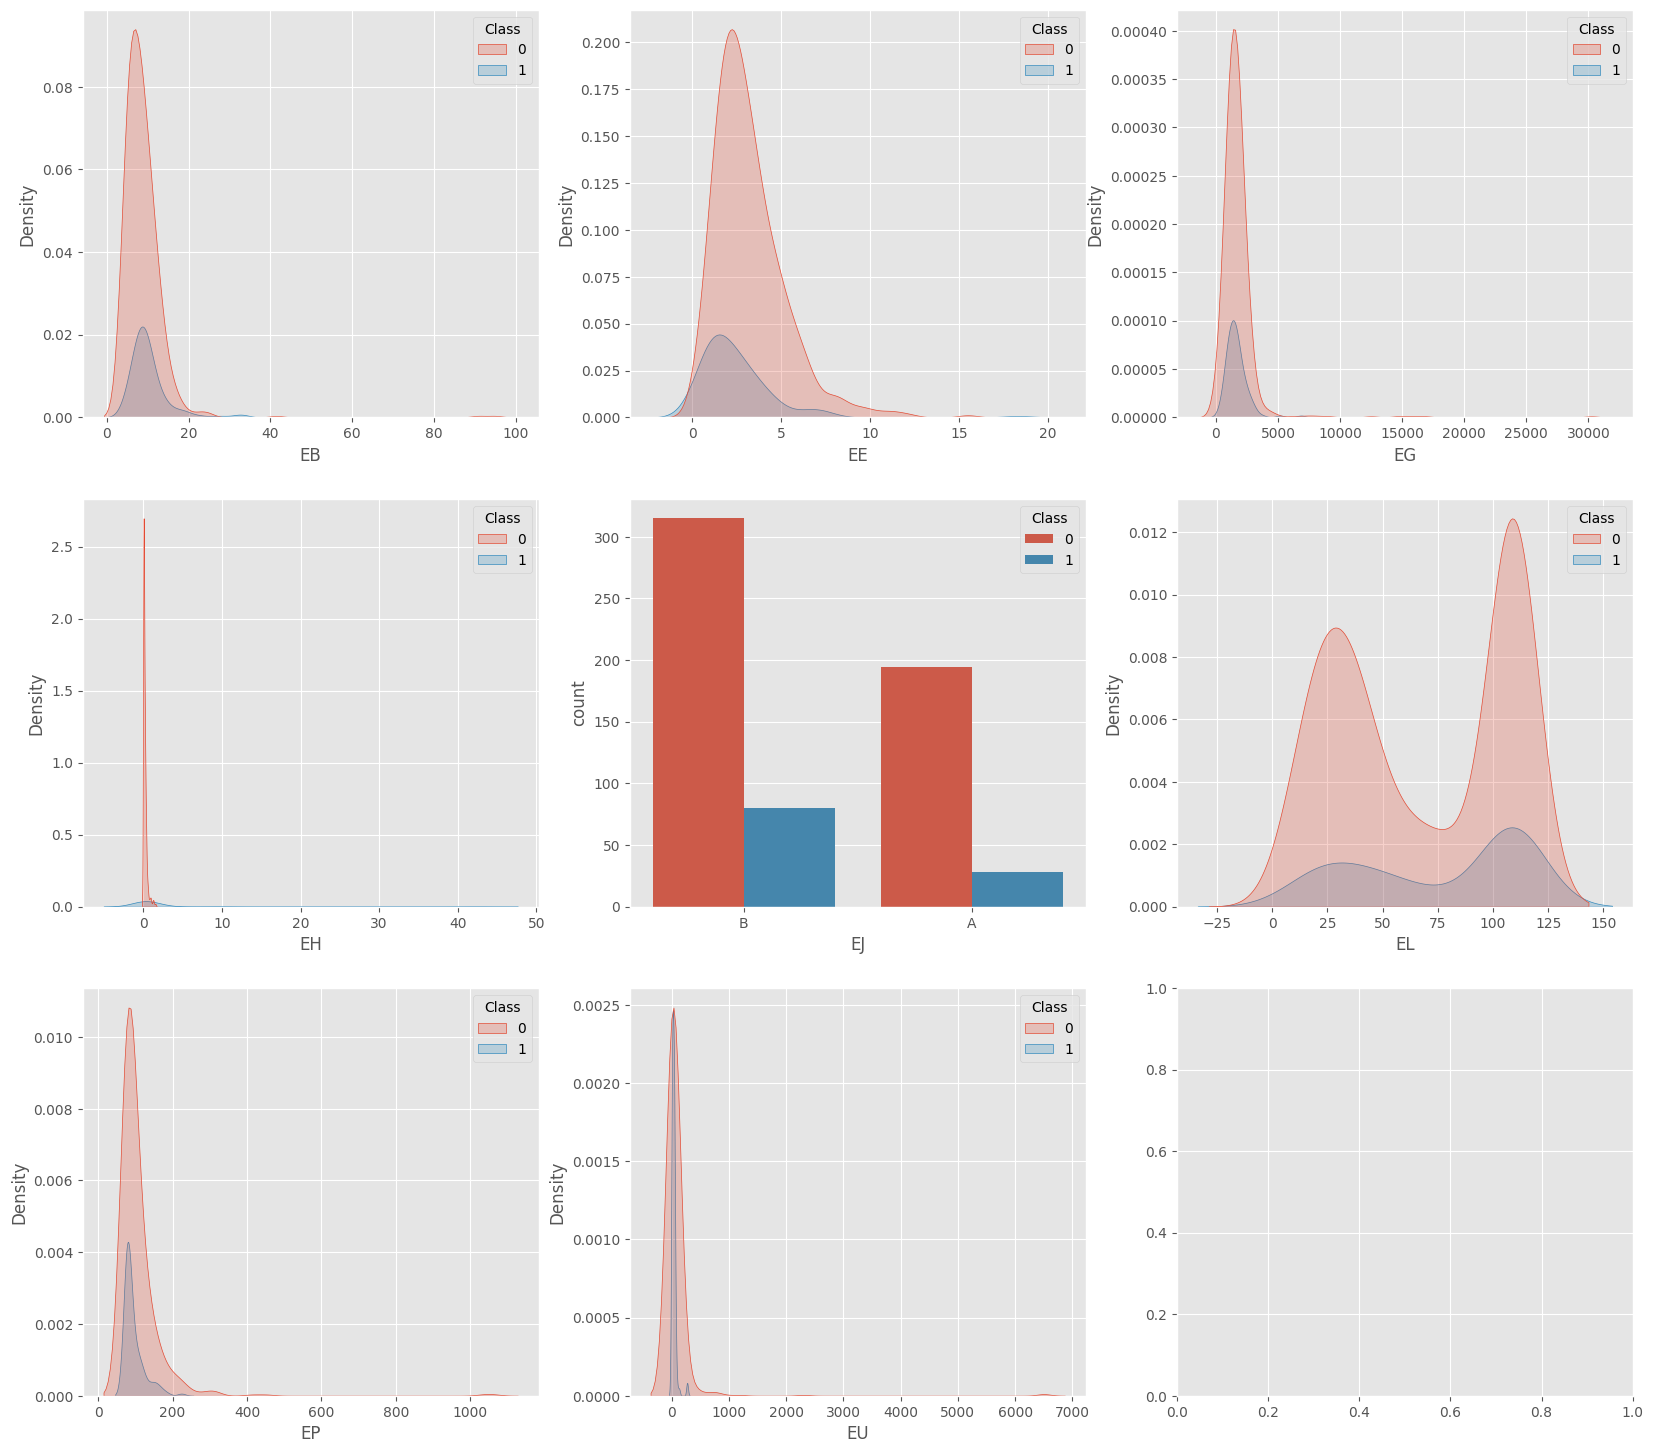

In [11]:
fig, axes = plt.subplots(3, 3, figsize = (20, 18))

sns.kdeplot(ax = axes[0, 0], x = 'EB', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[0, 1], x = 'EE', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[0, 2], x = 'EG', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[1, 0], x = 'EH', hue = 'Class', data = train, fill = True)
sns.countplot(ax = axes[1, 1], x = 'EJ', hue = 'Class', data = train)
sns.kdeplot(ax = axes[1, 2], x = 'EL', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[2, 0], x = 'EP', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[2, 1], x = 'EU', hue = 'Class', data = train, fill = True)

From the above, the distribution of `Class` is very similar in 0 and 1. Next we compare the distribution of `Class` of features that start with `F`.

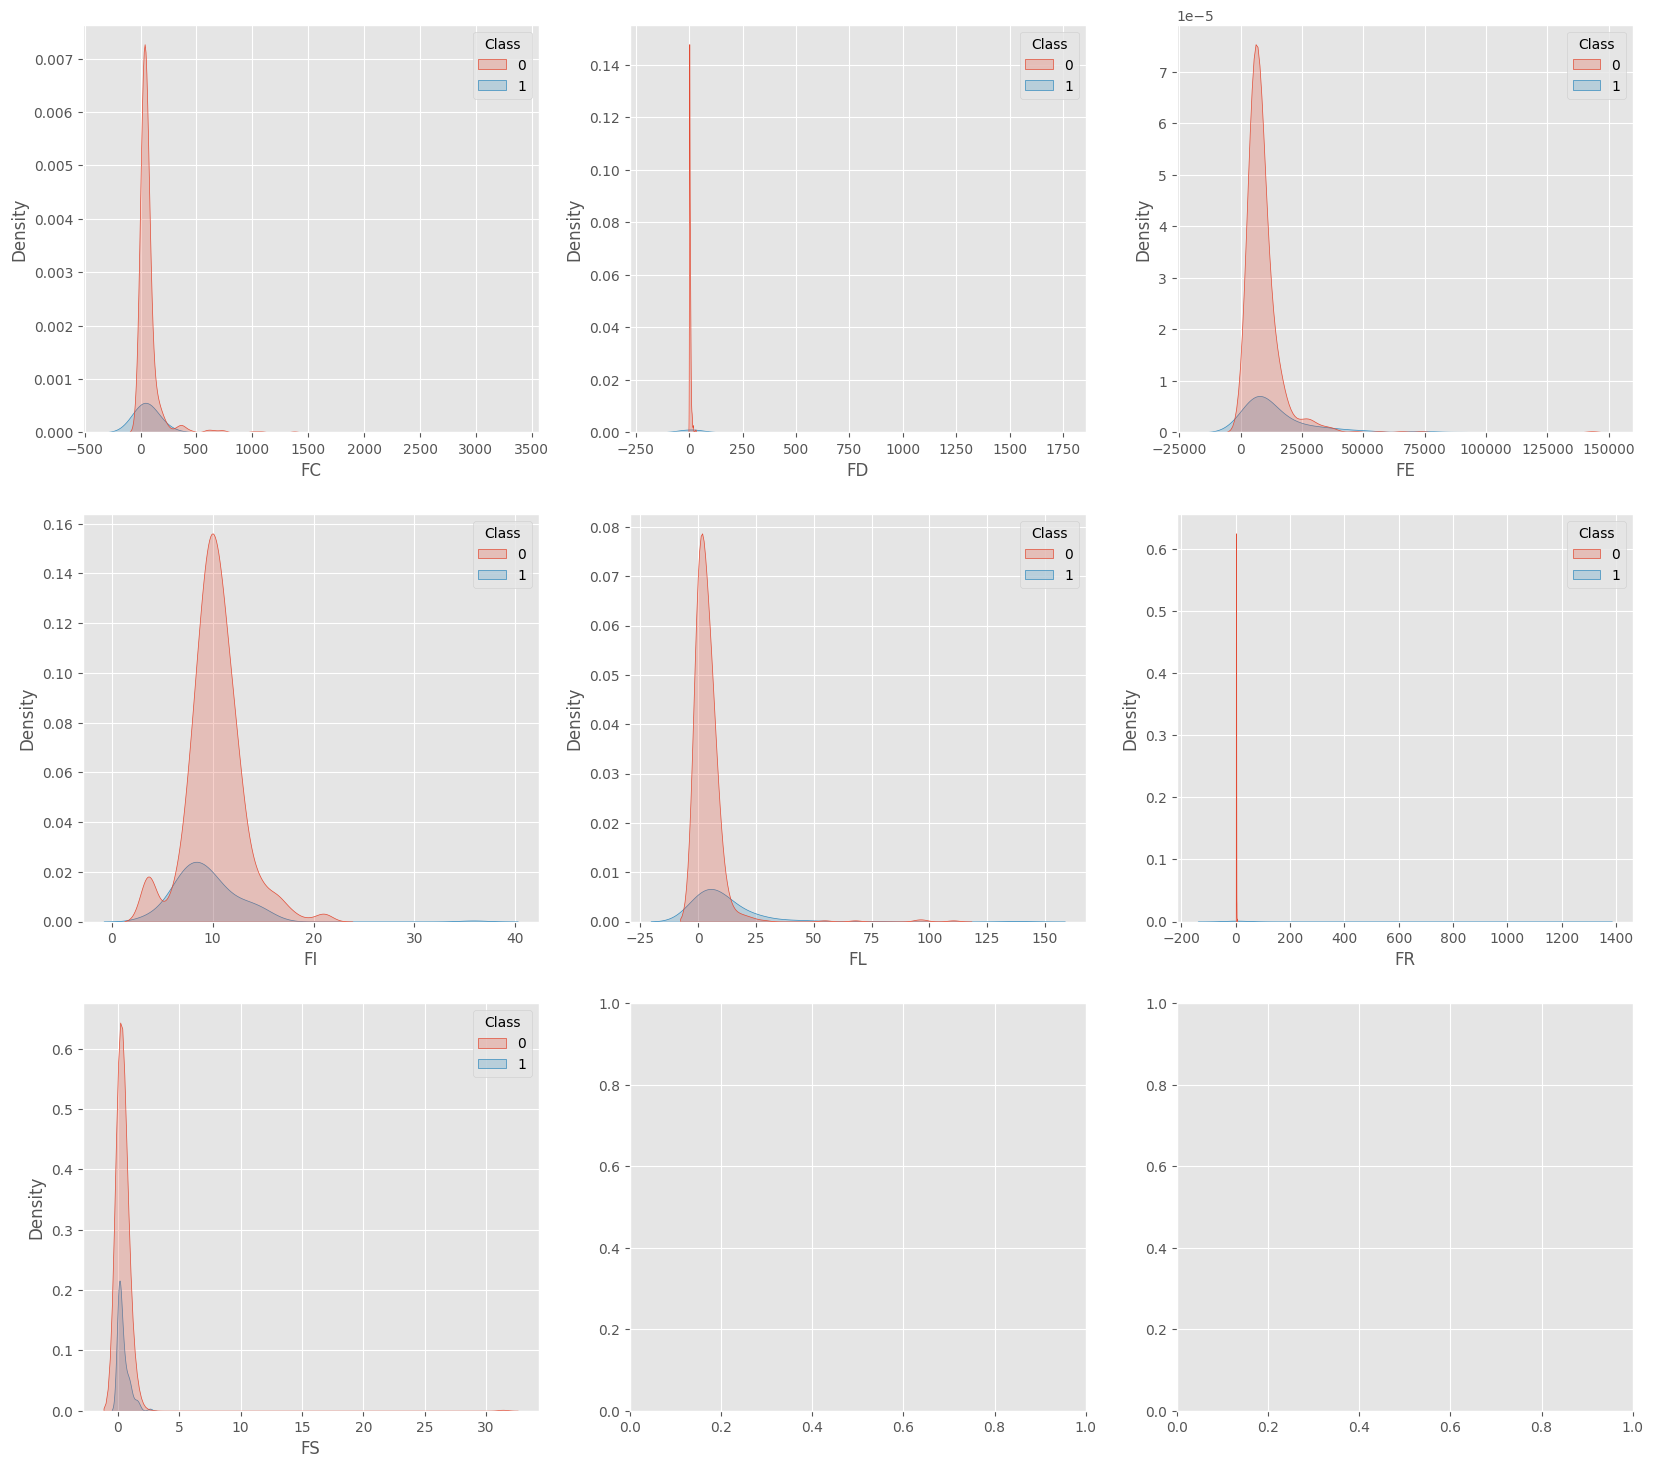

In [12]:
fig, axes = plt.subplots(3, 3, figsize = (20, 18))

sns.kdeplot(ax = axes[0, 0], x = 'FC', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[0, 1], x = 'FD', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[0, 2], x = 'FE', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[1, 0], x = 'FI', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[1, 1], x = 'FL', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[1, 2], x = 'FR', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[2, 0], x = 'FS', hue = 'Class', data = train, fill = True);

From the above, the distribution of `Class` is very similar in 0 and 1. Next we compare the distribution of `Class` of features that start with `G`.

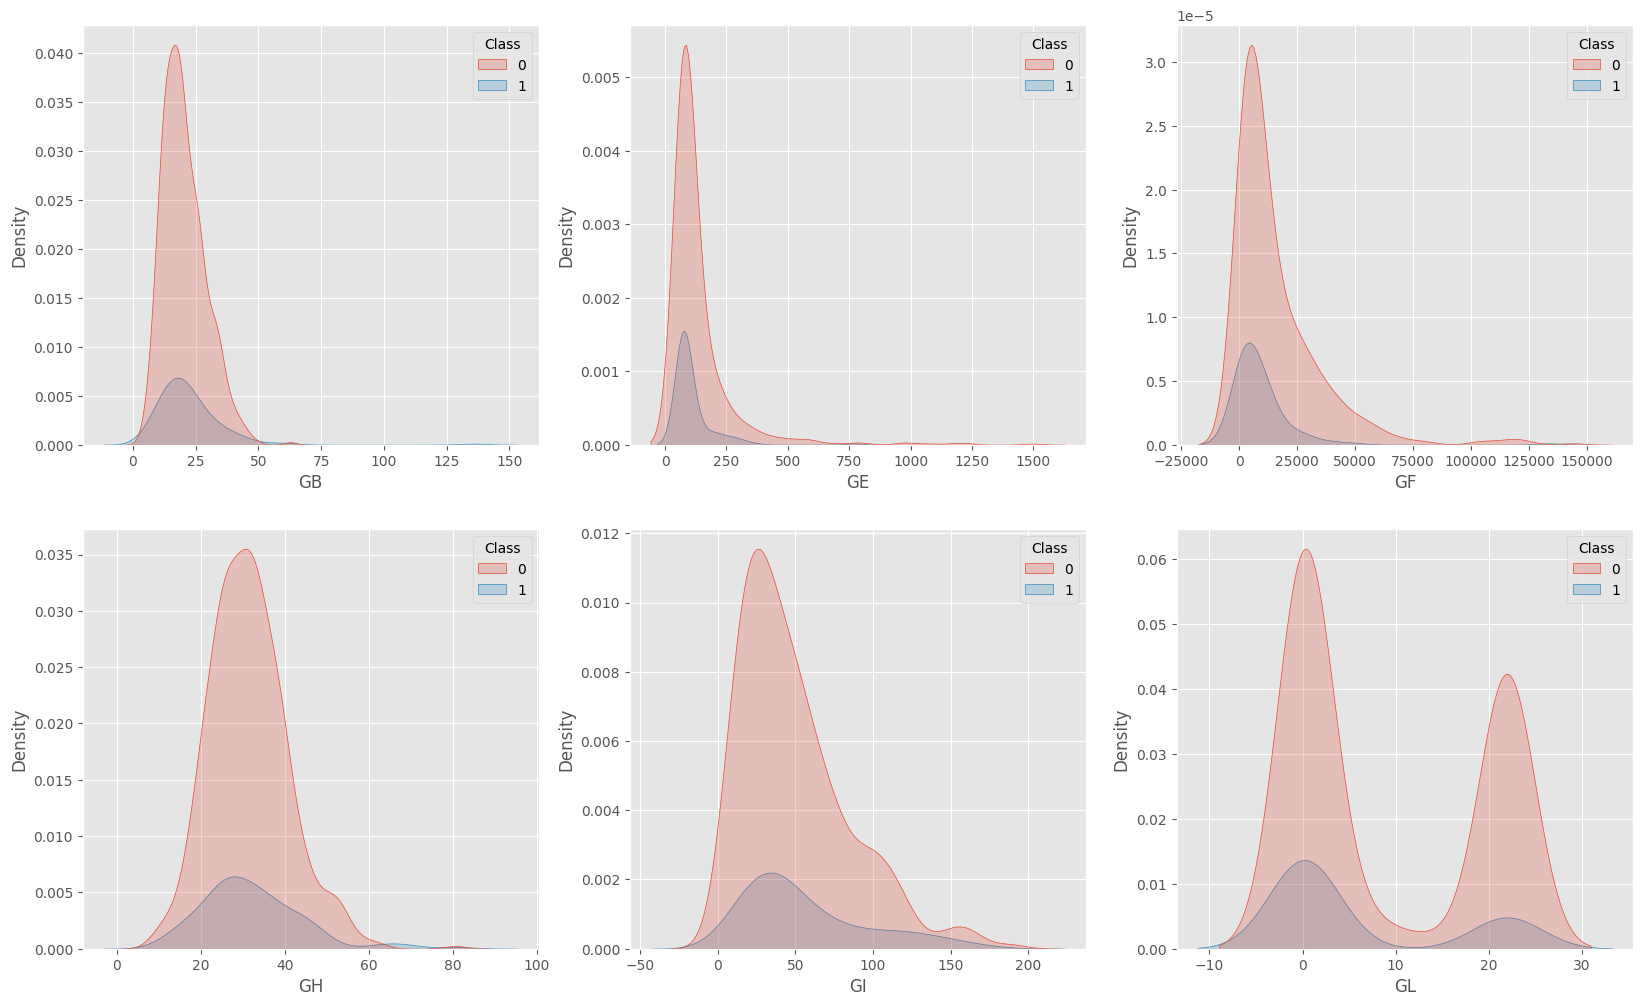

In [13]:
fig, axes = plt.subplots(2, 3, figsize = (20, 12))

sns.kdeplot(ax = axes[0, 0], x = 'GB', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[0, 1], x = 'GE', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[0, 2], x = 'GF', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[1, 0], x = 'GH', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[1, 1], x = 'GI', hue = 'Class', data = train, fill = True)
sns.kdeplot(ax = axes[1, 2], x = 'GL', hue = 'Class', data = train, fill = True);

From the above, the distribution of `Class` is very similar in 0 and 1.

<a id="5"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Baseline Modeling 1.0</h1>


In [14]:
X = train.drop(columns = ['Id', 'Class'], axis = 1)
X['EJ'] = np.where(X['EJ'] == 'A', 0, 1)
Y = train['Class']

test_baseline = test.drop(columns = ['Id'], axis = 1)
test_baseline['EJ'] = np.where(test_baseline['EJ'] == 'A', 0, 1)

cv_scores, log_loss_scores = list(), list()
preds = list()

skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
    
for train_ix, test_ix in skf.split(X, Y):
        
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
    
    ###########################
    ## HistGrandientBoosting ##
    ###########################
    
    hist_md = HistGradientBoostingClassifier(l2_regularization = 0.01,
                                               early_stopping = False,
                                               learning_rate = 0.01,
                                               max_iter = 300,
                                               max_depth = 3,
                                               max_bins = 255,
                                               min_samples_leaf = 10,
                                               max_leaf_nodes = 10).fit(X_train, Y_train)    
        
    hist_pred_1 = hist_md.predict_proba(X_test)[:, 1]
    hist_pred_2 = hist_md.predict_proba(test_baseline)[:, 1]
        
    log_loss_scores.append(log_loss(Y_test, hist_pred_1))
    preds.append(hist_pred_2)
       
    cv_scores.append(np.mean(log_loss_scores))

hist_cv_score = np.mean(cv_scores)    
print('The oof average log-loss score of the HistGradientBoosting model over 5-folds is:', hist_cv_score)

The oof average log-loss score of the HistGradientBoosting model over 5-folds is: 0.20727750597993758


In [15]:
hist_preds_test = pd.DataFrame(preds).apply(np.mean, axis = 1)

submission[['class_0', 'class_1']] = np.array([1 - hist_preds_test, hist_preds_test]).T
submission

,Id,class_0,class_1
0,00eed32682bb,0.862341,0.137659
1,010ebe33f668,0.882948,0.117052
2,02fa521e1838,0.945383,0.054617
3,040e15f562a2,0.745970,0.254030
4,046e85c7cc7f,0.931635,0.068365
